<a href="https://colab.research.google.com/github/Kairos1708/Se-ales_y_Sistemas/blob/main/TALLER_09_NOV_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller 09 - Nov - 2023** \\
**Señales y Sistemas** \\
**Juan Esteban Montes Salazar - 11935240007**


* Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa.

In [3]:
# librerías

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy
import sympy as sym
import ipywidgets

from scipy import signal
from IPython.display import Markdown as md
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from sympy import DiracDelta, S
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML
import warnings
sym.init_printing()

#Impulso, con condiciones iniciales 0
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t) # entrada impulso que en laplace es 1
y = y.simplify()
y

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

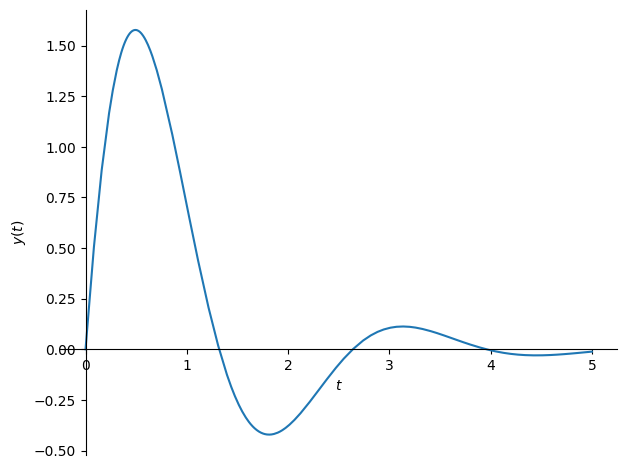

In [4]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [5]:
yext = y
yext.simplify()

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

In [6]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [7]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

       -t    ⎛√51⋅t⎞                 
7⋅√51⋅ℯ  ⋅sin⎜─────⎟                 
             ⎝  3  ⎠    -t    ⎛√51⋅t⎞
──────────────────── - ℯ  ⋅cos⎜─────⎟
         51                   ⎝  3  ⎠

In [8]:
y = yext + yint
y.simplify()

⎛         ⎛√51⋅t⎞             ⎞    
⎜9⋅√51⋅sin⎜─────⎟             ⎟    
⎜         ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜──────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝       17             ⎝  3  ⎠⎠    

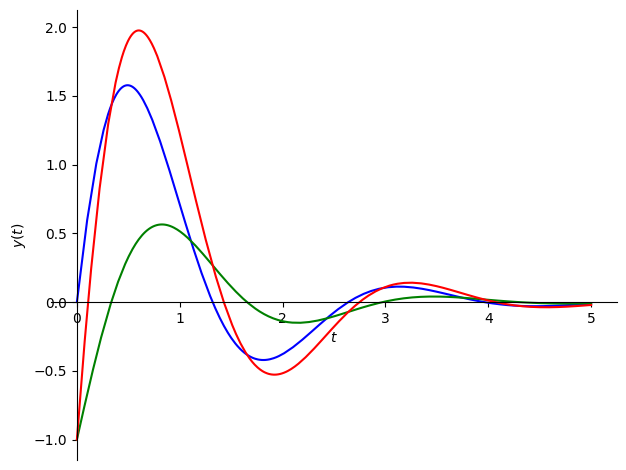

In [9]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

In [10]:
# Escalón unitario con condiciones iniciales 0
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t) # entrada escalón unitario en laplace es 1/s
y = y.simplify()
y

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

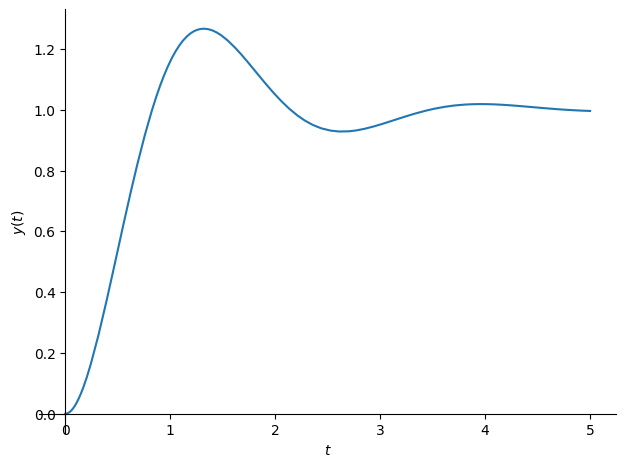

In [11]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [12]:
yext = y
yext.simplify()

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

In [13]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [14]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 2).subs(y0, 3), s, t)
yint

        -t    ⎛√51⋅t⎞                   
29⋅√51⋅ℯ  ⋅sin⎜─────⎟                   
              ⎝  3  ⎠      -t    ⎛√51⋅t⎞
───────────────────── + 3⋅ℯ  ⋅cos⎜─────⎟
          51                     ⎝  3  ⎠

In [15]:
y = yext + yint
y.simplify()

⎛               ⎛√51⋅t⎞               ⎞    
⎜     26⋅√51⋅sin⎜─────⎟               ⎟    
⎜ t             ⎝  3  ⎠        ⎛√51⋅t⎞⎟  -t
⎜ℯ  + ───────────────── + 2⋅cos⎜─────⎟⎟⋅ℯ  
⎝             51               ⎝  3  ⎠⎠    

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

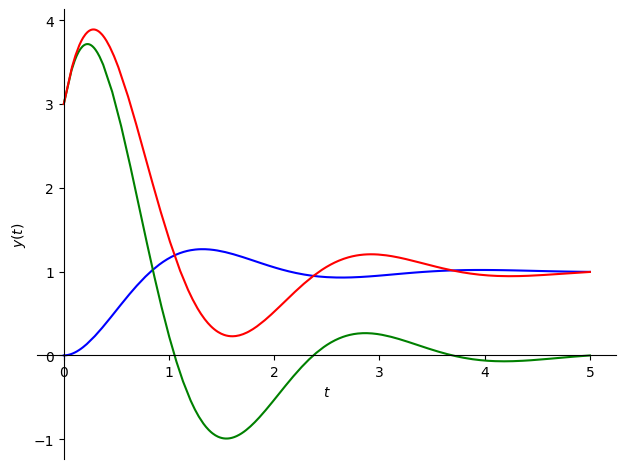

In [16]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

In [17]:
# RAMPA con condiciones inicales 0
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:2 , L: sym.Rational('.8'), C: sym.Rational('.8')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s**2), s, t) # entrada rampa en lapalce 1/s**2
y = y.simplify()

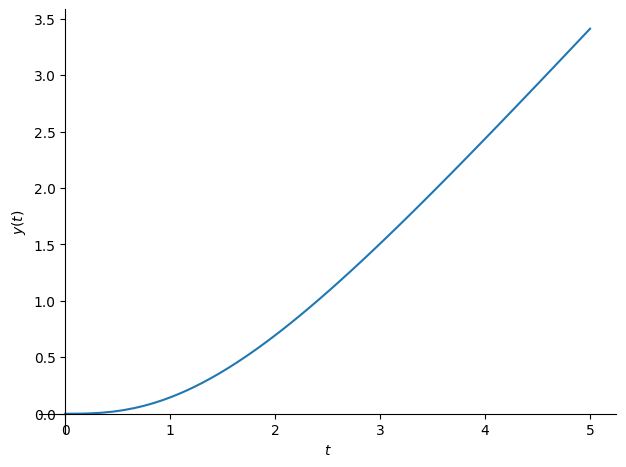

In [18]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [19]:
yext = y
yext.simplify()

                      -5⋅t 
       -5⋅t           ─────
       ─────            4  
         4     8   8⋅ℯ     
t + t⋅ℯ      - ─ + ────────
               5      5    

In [20]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [21]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, -1).subs(y0, 4), s, t)
yint

      -5⋅t            
      ─────      -5⋅t 
        4        ─────
15⋅t⋅ℯ             4  
─────────── + 4⋅ℯ     
     4                

In [22]:
y = yext + yint
y.simplify()

⎛                    5⋅t      ⎞  -5⋅t 
⎜                    ───      ⎟  ─────
⎜                     4       ⎟    4  
⎝95⋅t + 4⋅(5⋅t - 8)⋅ℯ    + 112⎠⋅ℯ     
──────────────────────────────────────
                  20                  

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

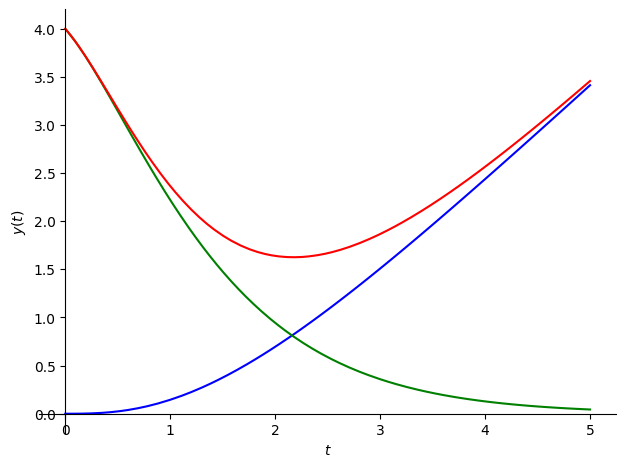

In [23]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()